In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

# Independent and Dependent Variables 

In [8]:
X = df.iloc[:, :-1]
Y = df['target']

# Check for Imbalanced DataSet

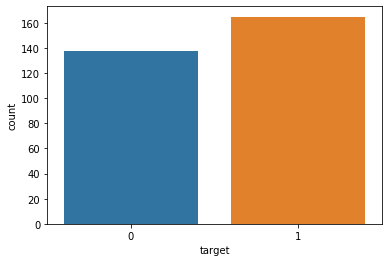

In [9]:
sns.countplot(Y)

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Visualizing the continuous Variables

In [11]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Skewness of age: -0.2024633654856539
Skewness of trestbps: 0.7137684379181465
Skewness of chol: 1.1434008206693387
Skewness of thalach: -0.5374096526832253
Skewness of oldpeak: 1.269719930601997


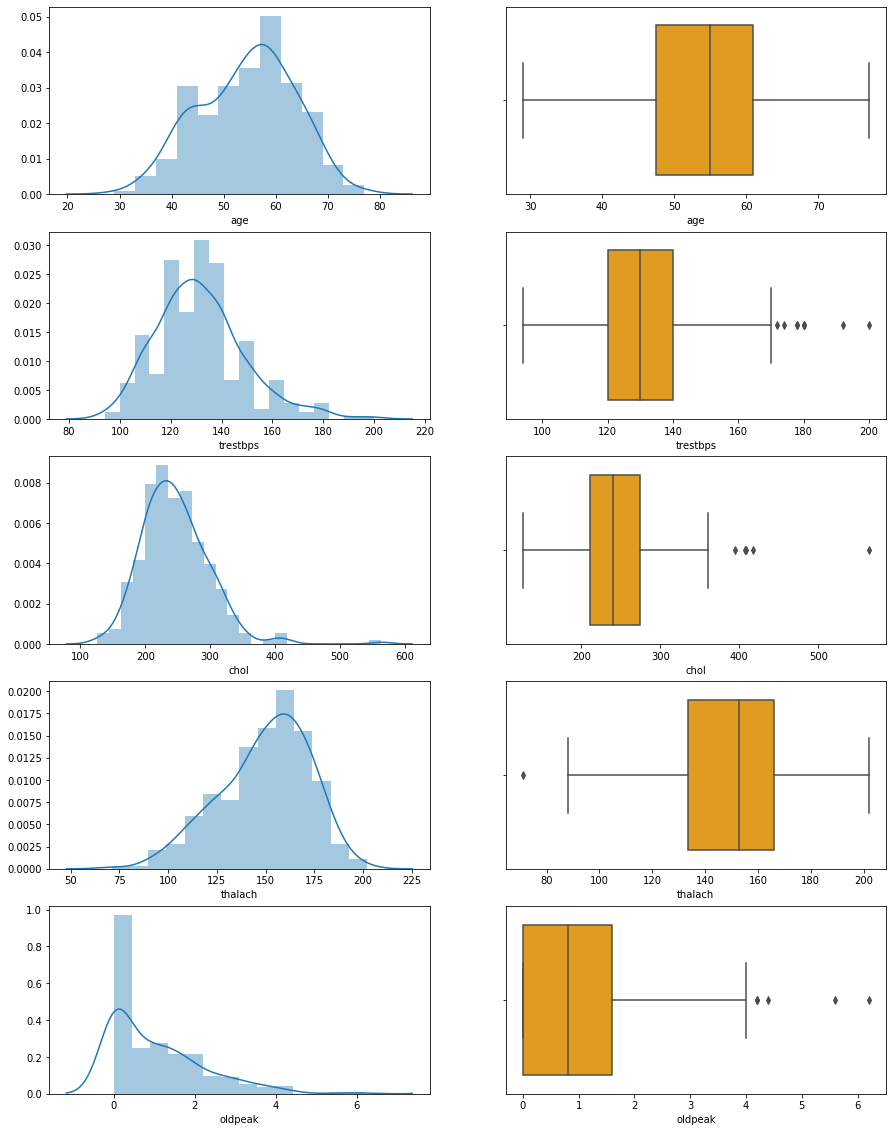

In [12]:
# Checking for outliars in G3 by histogram and Boxplot
fig, ax =plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for feature, axis in zip(features, ax):

    sns.distplot(a=df[feature], kde=True, ax=axis[0], axlabel=f'{feature}')  # Histogram
    print(f"Skewness of {feature}: {pd.Series(df[feature]).skew()}")

    sns.boxplot(x=df[feature], color='orange', ax=axis[1])  # Boxplot
    axis[1].set(xlabel=f'{feature}')      

In [13]:
# Remove the skewness of 'trestbps'

mask = df['trestbps'] > 185
df[mask]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [14]:
df = df[~mask]

In [15]:
# Remove the skewness of 'oldpeak'

mask = df['oldpeak'] > 5
df[mask]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [16]:
df = df[~mask]

In [17]:
# Remove the skewness of 'chol'

mask = df['chol'] > 500
df[mask]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [18]:
df = df[~mask]

In [19]:
# Remove the skewness of 'thalach'

mask = df['thalach'] < 80
df[mask]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [20]:
df = df[~mask]

In [21]:
df.shape

(297, 14)

# Feature Selection

## Correlation Matrix

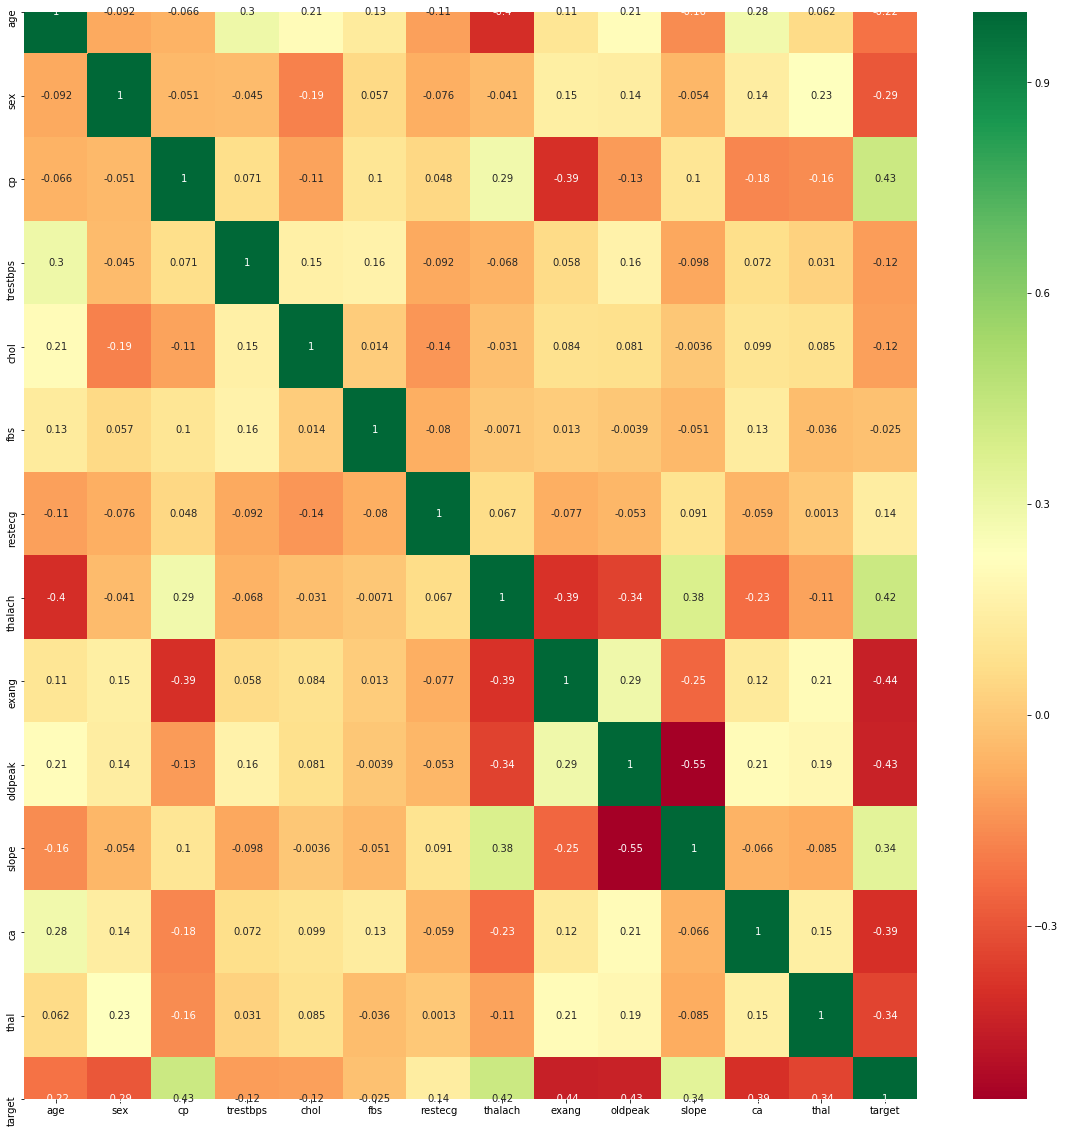

In [22]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Univariate feature selection

In [23]:
# <<--- Chi Square --->>

from sklearn.feature_selection import chi2

chi_score, p_value = chi2(X=X, y=Y)

print('Chi Score: ', chi_score)
print('\nP Values: ', p_value)

Chi Score:  [ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]

P Values:  [1.39567266e-06 5.91231763e-03 2.53498179e-15 1.18028642e-04
 9.95714828e-07 6.52363208e-01 8.43893904e-02 7.39510166e-43
 4.42807388e-10 1.55258340e-17 1.74123685e-03 3.60567663e-16
 1.61006098e-02]


In [24]:
p_value < 0.05

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [25]:
list(zip(X.columns, p_value < 0.05))

[('age', True),
 ('sex', True),
 ('cp', True),
 ('trestbps', True),
 ('chol', True),
 ('fbs', False),
 ('restecg', False),
 ('thalach', True),
 ('exang', True),
 ('oldpeak', True),
 ('slope', True),
 ('ca', True),
 ('thal', True)]

# Visualize the Classes with the help of Dimension Reduction

## PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA()  
pca.fit(X)
temp_x_train = pca.transform(X.values)
temp_x_test = pca.transform(Y.values.reshape(-1, 1))

In [27]:
pca_percentage = pca.explained_variance_ratio_ * 100  # It gives us percentage of variance done by each PCA
pca_percentage

array([7.47564199e+01, 1.50370221e+01, 8.45968470e+00, 1.62159604e+00,
       3.84085658e-02, 2.81234229e-02, 2.28993383e-02, 9.98328415e-03,
       7.72143117e-03, 5.87402295e-03, 5.02927817e-03, 4.09679747e-03,
       3.14113086e-03])

[Text(0, 0.5, 'Percentage(%)'),
 Text(0.5, 0, 'PCA'),
 Text(0.5, 1.0, 'PCA plot')]

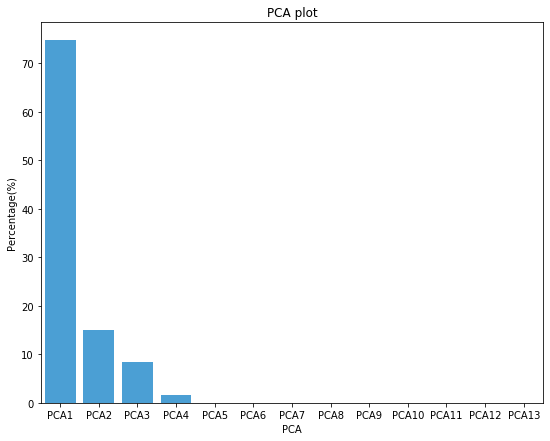

In [28]:
PCA =['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']

# PLot the data

plt.rcParams["figure.figsize"] = (9, 7)

ax = sns.barplot(x=PCA, y= pca_percentage, color='#34a4eb')

ax.set(xlabel='PCA', ylabel='Percentage(%)', title='PCA plot')

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Select only first 2 PCA's by n_components = 2  
pca.fit(X)
pca_values = pca.transform(X.values)

In [30]:
pca_1 = pca_values[:, 0]
pca_2 = pca_values[:, 1]
target = Y

In [31]:
temp_df = pd.DataFrame(data=zip(pca_1, pca_2, target), index=range(0, len(target)), 
                        columns=['PCA 1', 'PCA 2', 'target'])

temp_df.head()

,PCA 1,PCA 2,target
0,-12.267345,2.873838,1
1,2.690137,-39.871374,1
2,-42.950214,-23.636820,1
3,-10.944756,-28.438036,1
4,106.979053,-15.874468,1


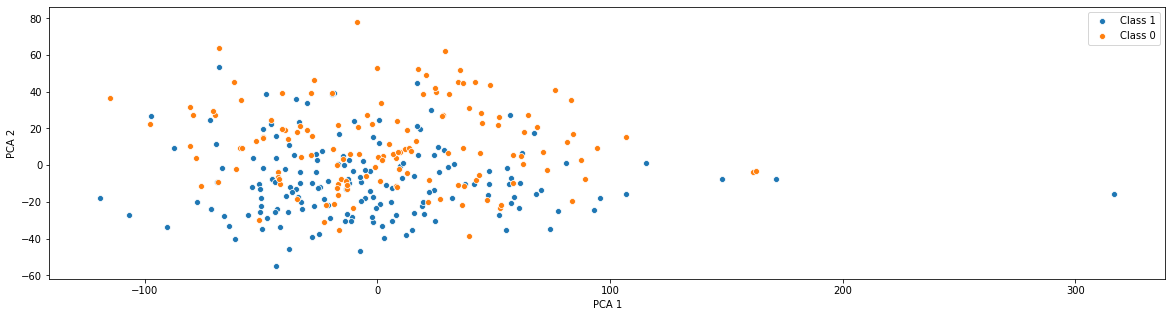

In [32]:
# Plot PCA

plt.rcParams["figure.figsize"] = (20, 5)

sns.scatterplot(x=temp_df[temp_df['target'] == 1]['PCA 1'], y=temp_df[temp_df['target'] == 1]['PCA 2'])
sns.scatterplot(x=temp_df[temp_df['target'] == 0]['PCA 1'], y=temp_df[temp_df['target'] == 0]['PCA 2'])

plt.legend(labels=['Class 1', 'Class 0'])

## LDA

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)  
lda.fit(X, Y)  # Note:- we use x_train and y_train to fit LDA not like only x_train in PCA
temp_x = lda.transform(X)

In [34]:
temp_x = temp_x.reshape((1, -1))

In [35]:
temp_df = pd.DataFrame(data=zip(temp_x[0], Y), index=range(0, len(Y)), 
                        columns=['LCA', 'target'])

temp_df.head()

,LCA,target
0,0.880048,1
1,0.427807,1
2,1.559464,1
3,1.173092,1
4,0.625089,1


### The parameter has no effect if it is equal to or greater than n_classes-1, because LDA will never use more dimensions than n_classes-1. So, if you have only two classes in your data, the output of LDA transform will be one-dimensional.

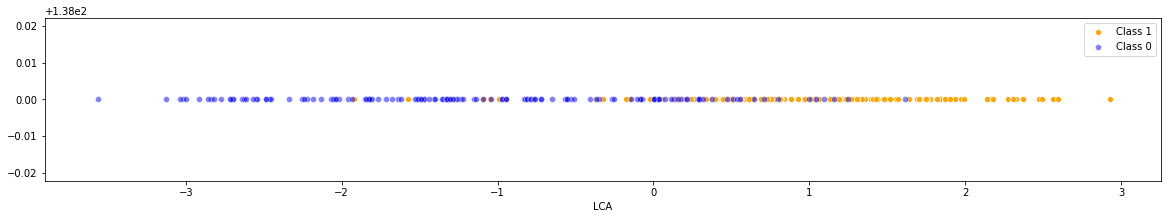

In [36]:
# Plot LCA

plt.rcParams["figure.figsize"] = (20, 3)

sns.scatterplot(x=temp_df[temp_df['target'] == 1]['LCA'], y=len(temp_df[temp_df['target'] == 0]['LCA']), color='orange', alpha=1)
sns.scatterplot(x=temp_df[temp_df['target'] == 0]['LCA'], y=len(temp_df[temp_df['target'] == 0]['LCA']), color='blue', alpha=0.5)

plt.legend(labels=['Class 1', 'Class 0'])

# Encode Categorical Variables

In [37]:
X = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=12)

# Scale the values

In [39]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(x_train.iloc[:, :5])
x_train.iloc[:, :5] = s.transform(x_train.iloc[:, :5])
x_test.iloc[:, :5] = s.transform(x_test.iloc[:, :5])

# Note:- 
## Chi square test tells that features 'fbs' and 'restecg' do not explains dependent variable 'target' very well (having significance level of 0.05). So we will make Models of 2 Data sets:- 
### 1. All Columns
### 2. Without 'fbs' and 'restecg'

# 1. All Columns

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# <<--- K fold cross validation --->> Before Parameter Tuning
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = random_forest_classifier, scoring='accuracy', X = x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 81.93 %
Standard Deviation: 6.39 %


In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [43]:
# Create the Random grid

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
# <<-- Check the best Random Forest Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = random_forest_classifier,
                           param_distributions  = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(x_train, y_train)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Accuracy: 82.82 %
Best Parameters: {'n_estimators': 890, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [46]:
final_random_forest_classifier = RandomForestClassifier(n_estimators= 890, min_samples_split= 2, min_samples_leaf= 1, 
                                                      max_features= 'auto', max_depth= 40, bootstrap= True)
final_random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=890,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
final_random_forest_predictions = final_random_forest_classifier.predict(x_test)

In [48]:
# <<--- Accuracy and Confusion matrix --->>

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, final_random_forest_predictions)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, final_random_forest_predictions)}')

Accuracy: 0.7236842105263158

Confusion Matrix: 
[[28 11]
 [10 27]]


In [49]:
# <<--- Precision, Recall, F1-Score --->>

from sklearn.metrics import classification_report

print(classification_report(y_test, final_random_forest_predictions))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        39
           1       0.71      0.73      0.72        37

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



## 2. Without 'fbs' and 'restecg' 

In [50]:
new_x_train = x_train.drop(labels=['fbs_1', 'restecg_1', 'restecg_1'], axis=1)
new_x_test = x_test.drop(labels=['fbs_1', 'restecg_1', 'restecg_1'], axis=1)

In [51]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(new_x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
# <<--- K fold cross validation --->> Before Parameter Tuning
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = random_forest_classifier, scoring='accuracy', X = new_x_train, y = y_train, cv = 10) 

print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 78.95 %
Standard Deviation: 7.38 %


In [54]:
# <<-- Check the best Random Forest Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = random_forest_classifier,
                           param_distributions  = parameters,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(new_x_train, y_train)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Accuracy: 82.38 %
Best Parameters: {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [55]:
final_random_forest_classifier = RandomForestClassifier(n_estimators= 1600, min_samples_split= 10, min_samples_leaf= 1, 
                                                      max_features= 'sqrt', max_depth= 20, bootstrap= True)
final_random_forest_classifier.fit(new_x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
final_random_forest_predictions = final_random_forest_classifier.predict(new_x_test)

In [57]:
# <<--- Accuracy and Confusion matrix --->>

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, final_random_forest_predictions)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, final_random_forest_predictions)}')

Accuracy: 0.7368421052631579

Confusion Matrix: 
[[29 10]
 [10 27]]


In [58]:
# <<--- Precision, Recall, F1-Score --->>

from sklearn.metrics import classification_report

print(classification_report(y_test, final_random_forest_predictions))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.73      0.73      0.73        37

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



# Save Model

In [59]:
import pickle  

with open('Model.txt','wb') as f:
    pickle.dump(final_random_forest_classifier, f)